In [1]:
## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf 
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf  # Import TensorFlow here

training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break                                  #pixels of each image

tf.Tensor(
[[[[169.25 163.25 173.25]
   [169.75 163.75 173.75]
   [170.5  164.5  174.5 ]
   ...
   [204.5  201.5  210.5 ]
   [201.75 198.75 207.75]
   [205.75 202.75 211.75]]

  [[171.   165.   175.  ]
   [167.25 161.25 171.25]
   [165.75 159.75 169.75]
   ...
   [197.5  194.5  203.5 ]
   [204.25 201.25 210.25]
   [202.   199.   208.  ]]

  [[168.75 162.75 172.75]
   [166.75 160.75 170.75]
   [168.5  162.5  172.5 ]
   ...
   [195.   192.   201.  ]
   [202.75 199.75 208.75]
   [204.   201.   210.  ]]

  ...

  [[129.75 119.75 127.75]
   [126.   116.   124.  ]
   [118.25 108.25 116.25]
   ...
   [ 42.75  31.75  45.75]
   [ 40.5   29.5   43.5 ]
   [ 42.5   31.5   45.5 ]]

  [[119.25 109.25 117.25]
   [124.5  114.5  122.5 ]
   [121.5  111.5  119.5 ]
   ...
   [ 43.75  32.75  46.75]
   [ 44.    33.    47.  ]
   [ 43.5   32.5   46.5 ]]

  [[112.5  102.5  110.5 ]
   [122.   112.   120.  ]
   [120.75 110.75 118.75]
   ...
   [ 39.5   28.5   42.5 ]
   [ 39.75  28.75  42.75]
   [ 44.5   33.5   4

In [5]:
### to avoid overshooting
#1. choose small learning rate default is 0.001 we are taking 0.0001
#2. there may be chance of underfitting , so increase number of neuron (means unable to capture entire info of data set) 
#3. Add more convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or lack of feature so feed with more feature

In [6]:
## Building Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,Input
from tensorflow.keras.models import Sequential

In [7]:
input_layer = Input(shape=[128, 128, 3])
model = Sequential()
model.add(input_layer)

In [8]:

# Convolutional layers with ReLU activation and MaxPooling
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))  # Removed input_shape
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))  # Removed input_shape
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

D:\Minor Project\cai\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))                             #to avoid the problem of over fitting

In [14]:
##flattening operation: 2D to 1D 
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [18]:
## compiling model               extracted features in summary
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
## Underfitting (too few epochs): If you use too few epochs, the model might not be exposed to the training data enough times to learn the underlying relationships effectively. This can lead to underfitting, where the model performs poorly on both training and validation data.
##Overfitting (too many epochs): Conversely, with too many epochs, the model might start to memorize the specific patterns in the training data and lose its ability to generalize to unseen data. This phenomenon is called overfitting
training_history2 = model.fit(x=training_set,validation_data=validation_set,epochs=5)


Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1619s 733ms/step - accuracy: 0.4197 - loss: 2.0575 - val_accuracy: 0.8496 - val_loss: 0.4747
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1274s 580ms/step - accuracy: 0.8477 - loss: 0.4887 - val_accuracy: 0.9154 - val_loss: 0.2622
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1289s 587ms/step - accuracy: 0.9076 - loss: 0.2829 - val_accuracy: 0.9163 - val_loss: 0.2676
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1368s 623ms/step - accuracy: 0.9368 - loss: 0.1941 - val_accuracy: 0.9279 - val_loss: 0.2259
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1422s 647ms/step - accuracy: 0.9522 - loss: 0.1479 - val_accuracy: 0.9486 - val_loss: 0.1674


In [22]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1770s 806ms/step - accuracy: 0.9710 - loss: 0.0881
Training accuracy: 0.9744789600372314


In [23]:
print(train_loss,train_acc)

0.07730179280042648 0.9744789600372314


In [24]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 250s 454ms/step - accuracy: 0.9455 - loss: 0.1836


In [25]:
print(val_loss,train_loss)

0.16691415011882782 0.07730179280042648


In [26]:
##saving the model

model.save("trained_model.keras")

In [29]:
## recording history

import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

NameError: name 'training_history' is not defined

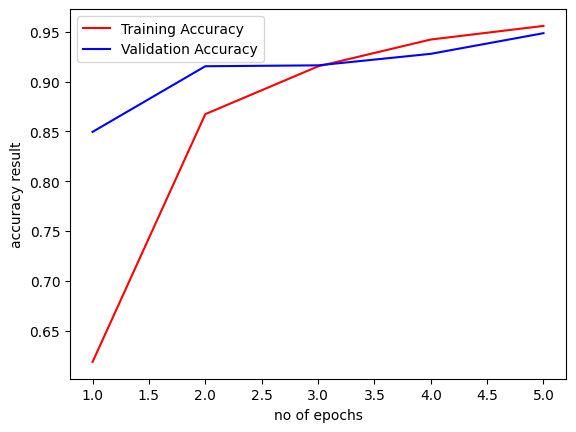

In [30]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history2.history['accuracy'],color ='red', label='Training Accuracy')
plt.plot(epochs,training_history2.history['val_accuracy'],color ='blue', label='Validation Accuracy')
plt.xlabel("no of epochs")
plt.ylabel("accuracy result")
plt.legend()
plt.show()

In [31]:
#some other matrics for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 236s 428ms/step


(array([[9.99966502e-01, 8.35195988e-06, 6.11314910e-09, ...,
         1.93209840e-11, 4.45200231e-11, 2.56352911e-10],
        [9.99989986e-01, 5.19601736e-06, 1.35598233e-09, ...,
         1.00478992e-13, 3.57147601e-12, 6.40090064e-12],
        [1.00000000e+00, 4.53420324e-09, 1.07459305e-10, ...,
         1.49683851e-14, 2.24353170e-13, 1.60559378e-11],
        ...,
        [2.50384478e-08, 1.01934139e-09, 1.40050034e-07, ...,
         1.83190085e-08, 1.35311795e-09, 9.99982953e-01],
        [1.32956035e-09, 3.51449750e-12, 5.07806641e-09, ...,
         5.13596221e-10, 2.37117617e-11, 9.99999881e-01],
        [1.64496403e-15, 4.74122689e-17, 2.56518608e-16, ...,
         5.66792957e-17, 1.95597843e-15, 9.99999642e-01]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories= tf.argmax(y_pred,axis=1)


In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.94      0.94       504
                                 Apple___Black_rot       1.00      0.95      0.98       497
                          Apple___Cedar_apple_rust       0.94      0.95      0.94       440
                                   Apple___healthy       0.92      0.92      0.92       502
                               Blueberry___healthy       0.86      0.99      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [41]:
cn = confusion_matrix(y_true,predicted_categories)
cn

array([[473,   0,   0, ...,   0,   0,   0],
       [  6, 473,   0, ...,   0,   0,   0],
       [  1,   0, 417, ...,   2,   2,   1],
       ...,
       [  0,   0,   0, ..., 479,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   1, ...,   0,   0, 478]], dtype=int64)

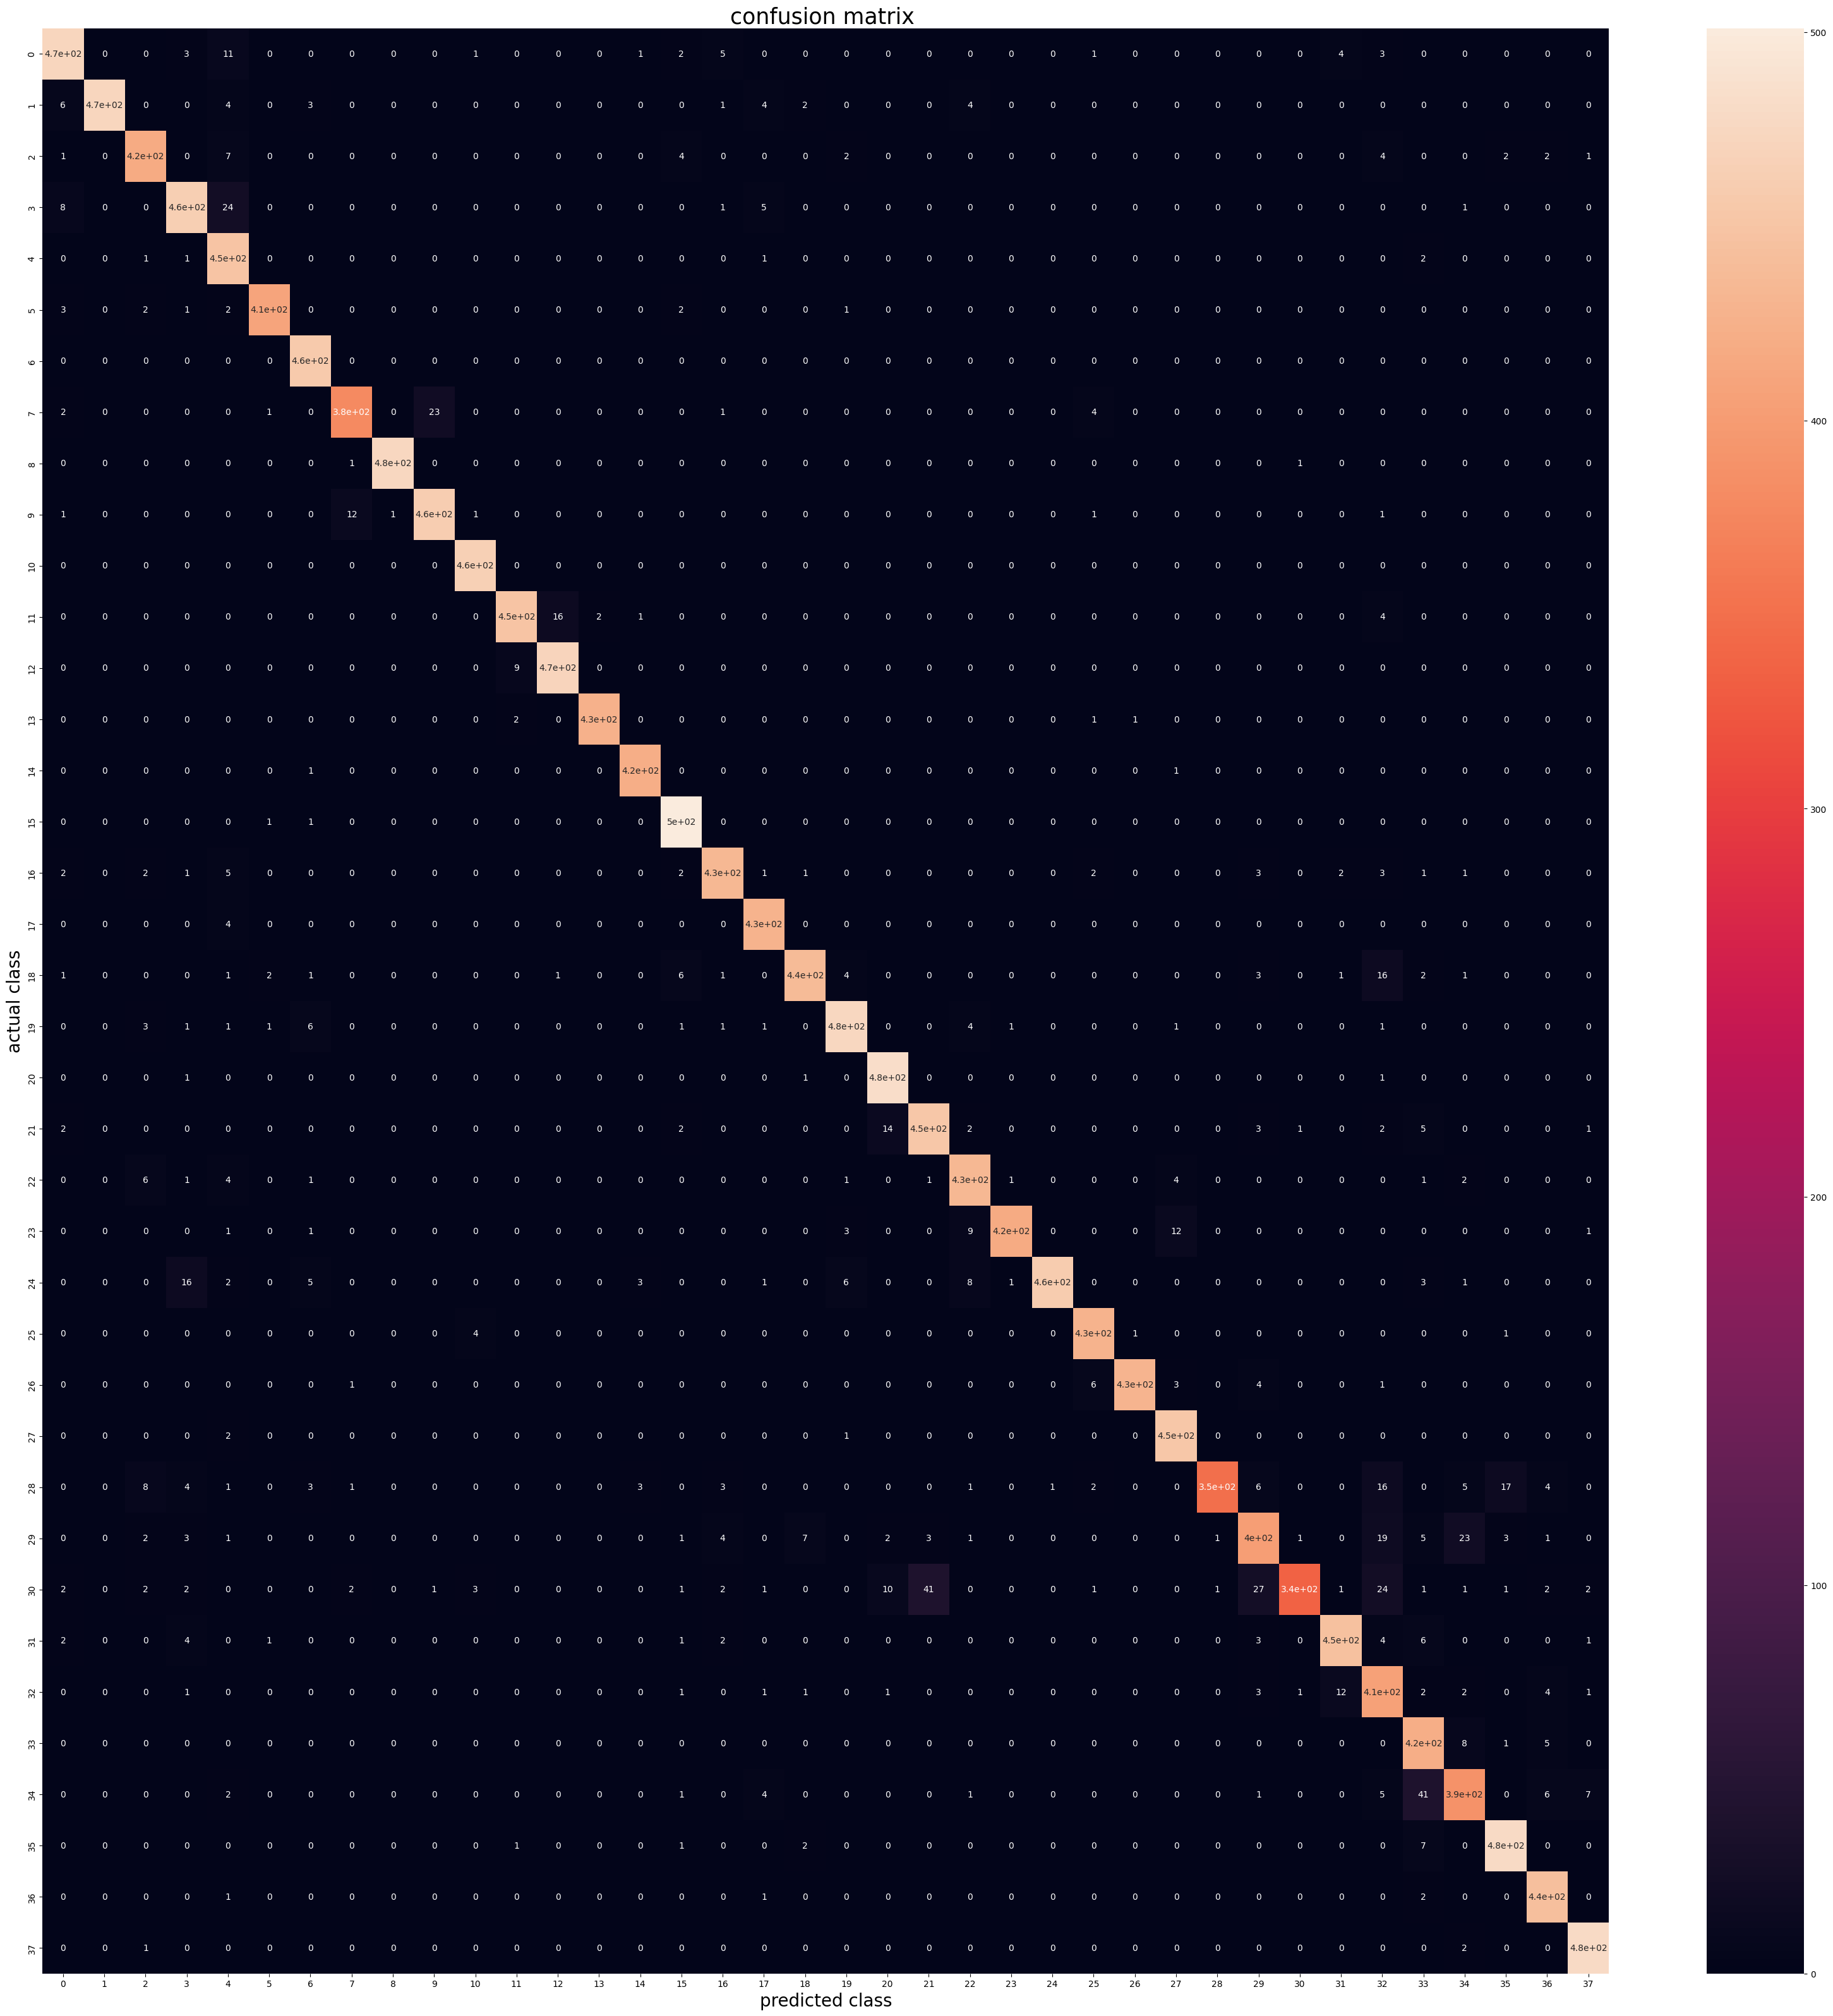

In [42]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.title("confusion matrix ",fontsize=25)
plt.show()
